In [1]:
#House Price Prediction using Machine Learning in Python
'''
House price prediction is a problem in the real estate industry to make informed decisions. 
By using machine learning algorithms we can predict the price of a house based on various 
features such as location, size, number of bedrooms and other relevant factors. 
In this article we will explore how to build a machine learning model in Python to predict 
house prices to gain valuable insights into the housing market.
'''
#To tackle this issue we will build a machine learning model trained on the House Price Prediction Dataset. 
#the dataset includes 13 features:

#Id	To count the records.
#MSSubClass	 Identifies the type of dwelling involved in the sale.
#MSZoning	Identifies the general zoning classification of the sale.
#LotArea	 Lot size in square feet.
#LotConfig	Configuration of the lot
#BldgType	Type of dwelling
#OverallCond	Rates the overall condition of the house
#YearBuilt	Original construction year
#YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).
#Exterior1st	Exterior covering on house
#BsmtFinSF2	Type 2 finished square feet.
#TotalBsmtSF	Total square feet of basement area
#SalePrice	To be predicted

'\nHouse price prediction is a problem in the real estate industry to make informed decisions. \nBy using machine learning algorithms we can predict the price of a house based on various \nfeatures such as location, size, number of bedrooms and other relevant factors. \nIn this article we will explore how to build a machine learning model in Python to predict \nhouse prices to gain valuable insights into the housing market.\n'

In [2]:
# =============================
# Import Required Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


In [3]:
# =============================
# Load and Split Dataset
# =============================
data = pd.read_excel("HousePricePrediction.xlsx")

# Split data into training and prediction sets
train_data = data[data['SalePrice'].notna()].copy()
predict_data = data[data['SalePrice'].isna()].copy()

# Drop ID column
train_data.drop(columns=['Id'], inplace=True)
predict_data.drop(columns=['Id'], inplace=True)


In [4]:
data.shape

(2919, 13)

In [5]:
train_data['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [6]:
# =============================
# Data Preprocessing
#Now, we categorize the features depending on their datatype (int, float, object) 
# =============================

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


In [7]:
train_data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [8]:
# =============================
# One-Hot Encode Categorical Variables
# =============================

from sklearn.preprocessing import  OneHotEncoder
object_cols = train_data.select_dtypes(include='object').columns.tolist()

OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # fixed for compatibility
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[object_cols]))
OH_cols_train.index = train_data.index
OH_cols_train.columns = OH_encoder.get_feature_names_out()

# Combine numerical + encoded categorical
train_num = train_data.drop(object_cols, axis=1)
df_final = pd.concat([train_num, OH_cols_train], axis=1)

In [9]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


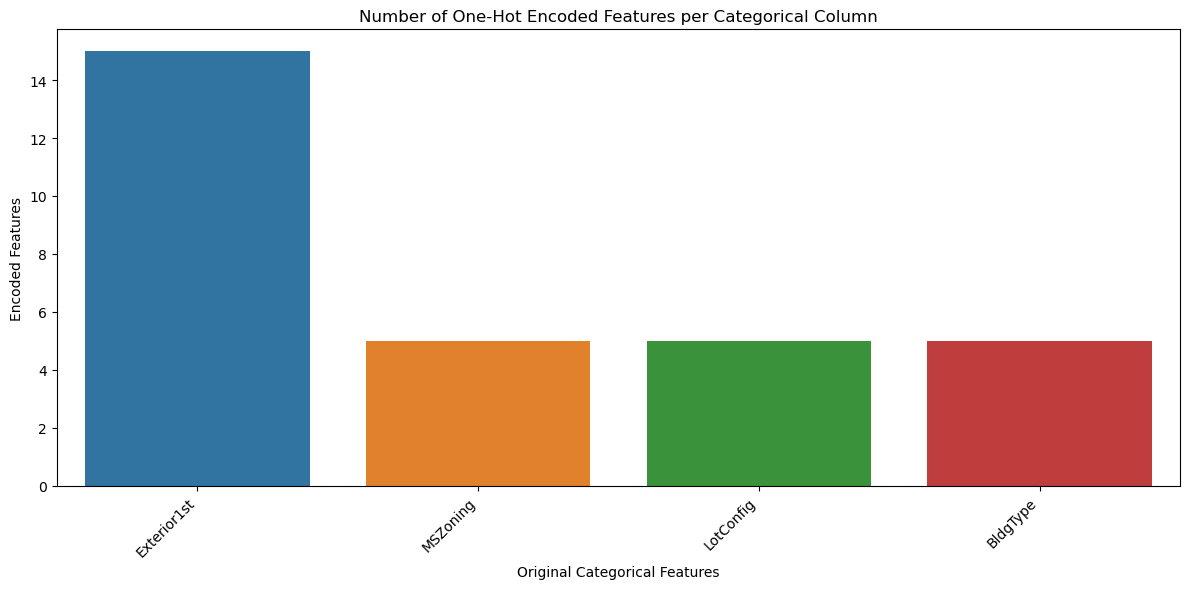

In [10]:
# =============================
# Bar Plot: No. of Encoded Features per Original Categorical Column
# =============================

# Step 1: Create a dictionary to hold the count of one-hot encoded columns per original categorical column
encoded_feature_counts = {}

# Step 2: Loop through each original categorical column
for col in object_cols:
    # Count how many one-hot encoded columns start with this column's name followed by '_'
    matching_cols = [c for c in OH_encoder.get_feature_names_out() if c.startswith(col + '_')]
    encoded_feature_counts[col] = len(matching_cols)

# Step 3: Convert the dictionary into a DataFrame for easier plotting
encoded_counts_df = pd.DataFrame.from_dict(
    encoded_feature_counts, 
    orient='index', 
    columns=['Encoded_Feature_Count']
)

# Step 4: Sort the DataFrame by the number of encoded features (descending order)
encoded_counts_df = encoded_counts_df.sort_values(by='Encoded_Feature_Count', ascending=False)

# Step 5: Plot the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(
    x=encoded_counts_df.index, 
    y='Encoded_Feature_Count', 
    data=encoded_counts_df
)
plt.title('Number of One-Hot Encoded Features per Categorical Column')  # Title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylabel("Encoded Features")  # y-axis label
plt.xlabel("Original Categorical Features")  # x-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


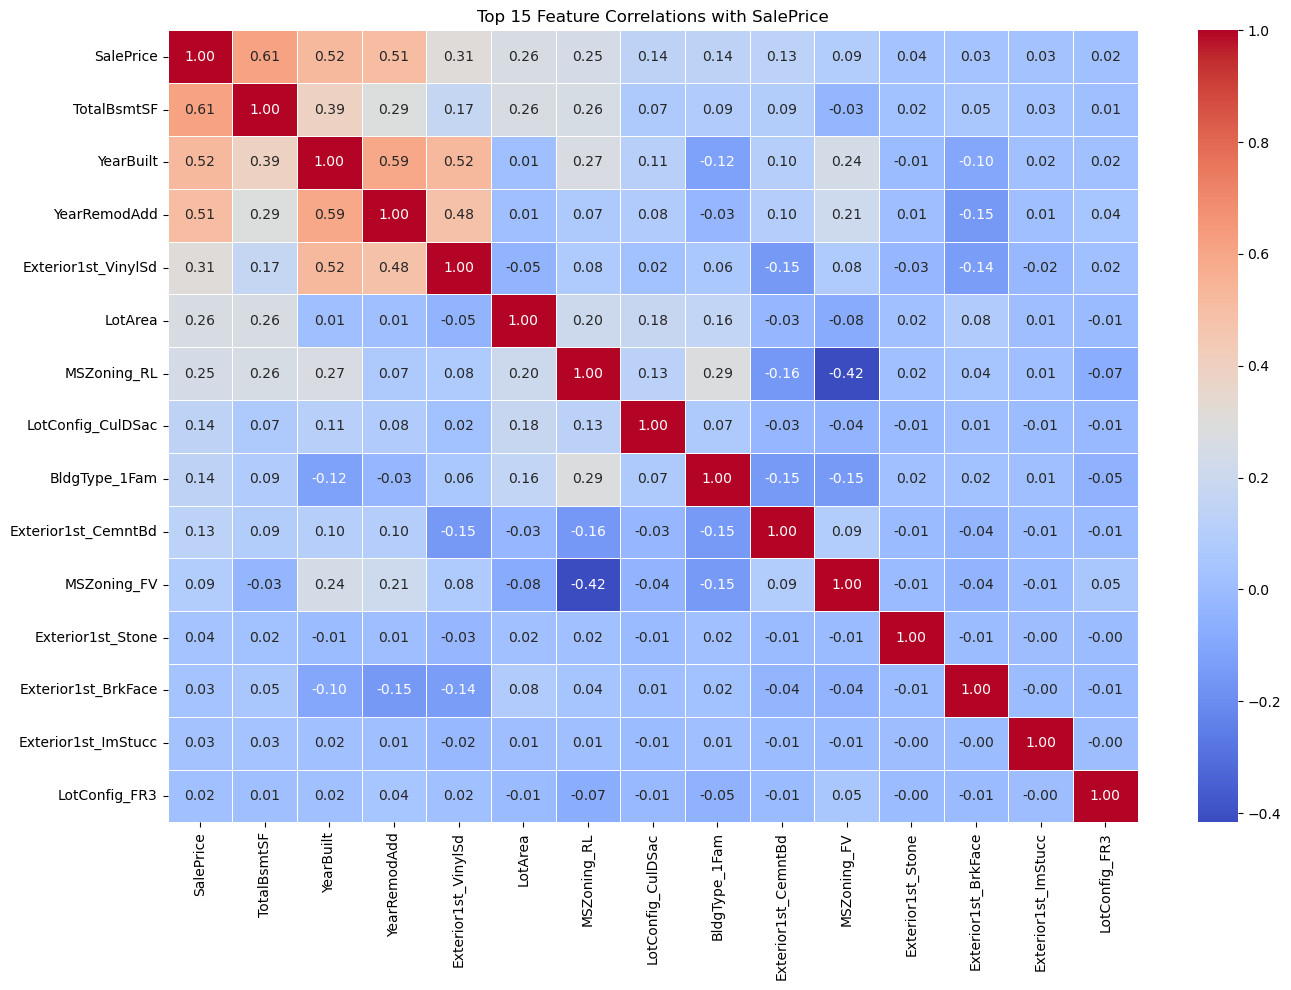

In [11]:
# =============================
# EDA - Correlation Matrix Heatmap
# =============================

# Step 1: Set the figure size for better visibility
plt.figure(figsize=(14, 10))

# Step 2: Compute the correlation matrix for all numeric features
corr_matrix = df_final.corr()

# Step 3: Extract correlations of all features with 'SalePrice', sorted in descending order
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Step 4: Get the names of the top 15 features most correlated with 'SalePrice'
top_corr_features = saleprice_corr.head(15).index

# Step 5: Create a correlation matrix for only the top 15 features
top_corr_matrix = df_final[top_corr_features].corr()

# Step 6: Plot the heatmap using seaborn
sns.heatmap(
    top_corr_matrix,          # Correlation matrix of top features
    annot=True,               # Display correlation coefficients in each cell
    cmap='coolwarm',          # Colormap: red-blue gradient
    fmt=".2f",                # Format numbers to 2 decimal places
    linewidths=0.5            # Add lines between cells
)

# Step 7: Add title and layout adjustments
plt.title("Top 15 Feature Correlations with SalePrice")
plt.tight_layout()            # Adjust plot to avoid clipping
plt.show()                    # Display the heatmap


Each cell represents the Pearson correlation coefficient between two variables.

The color scale:

Red (closer to +1): Strong positive correlation
 
Blue (closer to -1): Strong negative correlation

White or light color (near 0): No correlation

The diagonal is always 1.00 since a variable is perfectly correlated with itself.

| Feature               | Correlation with `SalePrice` | Insight                                                  |
| --------------------- | ---------------------------- | -------------------------------------------------------- |
| `TotalBsmtSF`         | **0.61**                     | Larger basements generally increase house value          |
| `YearBuilt`           | **0.52**                     | Newer homes tend to sell for more                        |
| `YearRemodAdd`        | **0.51**                     | Homes with recent renovations/remodels are more valuable |
| `Exterior1st_VinylSd` | **0.31**                     | Vinyl siding is more common in higher-priced homes       |
| `LotArea`             | **0.26**                     | Bigger lot size increases value but not strongly         |
| `MSZoning_RL`         | **0.25**                     | Residential low-density zones have higher-value homes    |

Features like Exterior1st_Stone, Exterior1st_ImStucc, and LotConfig_FR3 have very low correlation with SalePrice.

These may be less important for modeling, though interaction effects can still matter in tree-based models.

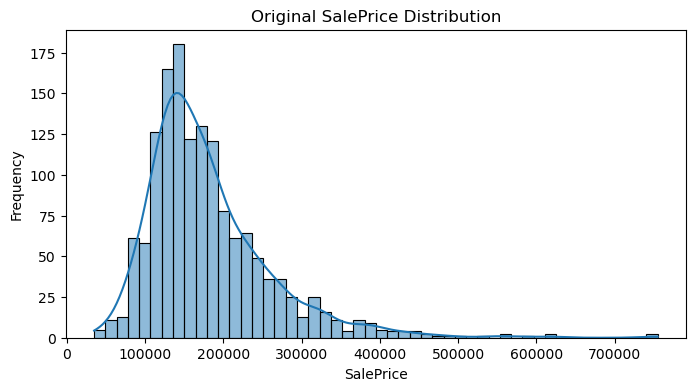

Original SalePrice skewness: 1.88


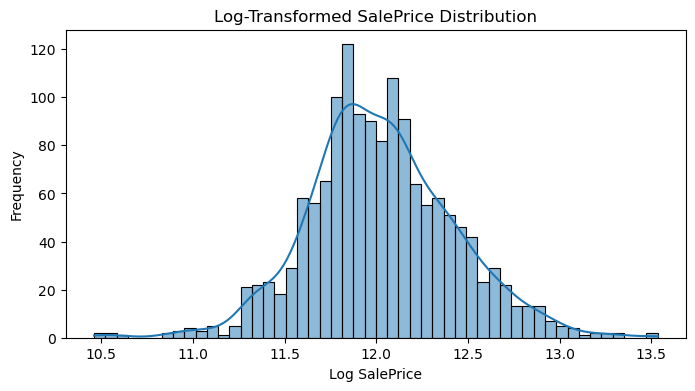

Log-Transformed SalePrice skewness: 0.12


In [12]:
# =============================
# Check and Plot Skewness
# =============================

# Step 1: Plot the original distribution of 'SalePrice'
plt.figure(figsize=(8, 4))  # Set figure size
sns.histplot(df_final['SalePrice'], kde=True, bins=50)  # Histogram + KDE
plt.title('Original SalePrice Distribution')  # Plot title
plt.xlabel('SalePrice')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()

# Step 2: Print original skewness
print(f"Original SalePrice skewness: {df_final['SalePrice'].skew():.2f}")

# Step 3: Apply log(1 + x) transformation to reduce positive skew
df_final['SalePrice'] = np.log1p(df_final['SalePrice'])

# Step 4: Plot the transformed distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_final['SalePrice'], kde=True, bins=50)
plt.title('Log-Transformed SalePrice Distribution')
plt.xlabel('Log SalePrice')
plt.ylabel('Frequency')
plt.show()

# Step 5: Print transformed skewness
print(f"Log-Transformed SalePrice skewness: {df_final['SalePrice'].skew():.2f}")


In [13]:
# =============================
# Train-Test Split
# =============================
from sklearn.model_selection import train_test_split

X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)


 Linear Regression
RMSE : 244389.89
MAE  : 41853.21
R²   : -7.6487
MAPE : 24.32 %


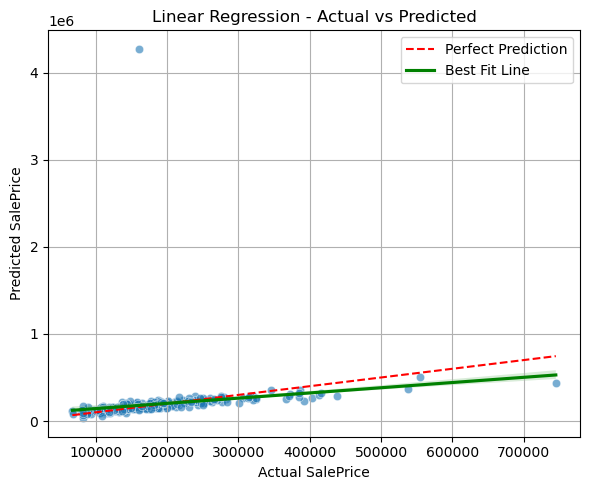

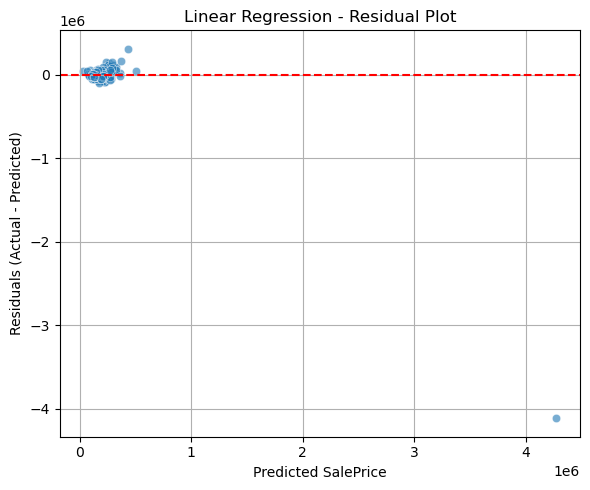

In [14]:
# ===============================
# Linear Regression: Training and Evaluation
# ===============================

# Import necessary metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# -------------------------------
# Train the Linear Regression model
# -------------------------------
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)  # Fit model on training data (log-transformed SalePrice)

# -------------------------------
# Predict on validation data
# -------------------------------
y_pred_log = model_lr.predict(X_valid)  # Predictions are in log scale

# Convert log-transformed predictions back to original scale
y_pred = np.expm1(y_pred_log)           # Predicted SalePrice
y_true = np.expm1(y_valid)              # Actual SalePrice
residuals = y_true - y_pred             # Residuals (errors)

# -------------------------------
# Evaluate performance using metrics
# -------------------------------
print(" Linear Regression")
print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))    # Root Mean Squared Error
print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))             # Mean Absolute Error
print("R²   :", round(r2_score(y_true, y_pred), 4))                        # Coefficient of Determination
print("MAPE :", round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2), "%")  # Mean Absolute Percentage Error

# -------------------------------
# Plot Actual vs Predicted values
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)  # Scatter of actual vs predicted
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction')  # Diagonal reference line
sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', label='Best Fit Line')  # Regression line
plt.title("Linear Regression - Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This plot shows how close the predictions are to the actual values.
# Points close to the red dashed line indicate better accuracy.

# -------------------------------
# Plot Residuals
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)  # Residuals vs Predicted
plt.axhline(0, color='red', linestyle='--')        # Zero-error reference line
plt.title("Linear Regression - Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# This plot helps detect patterns in prediction errors.
# A good model will show random scatter around the 0 line without obvious patterns.


 Lasso Regression
RMSE : 233516.09
MAE  : 41247.73
R²   : -6.8962
MAPE : 23.9 %


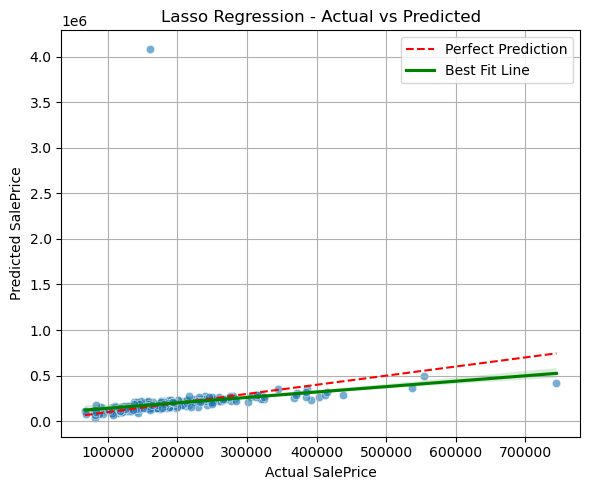

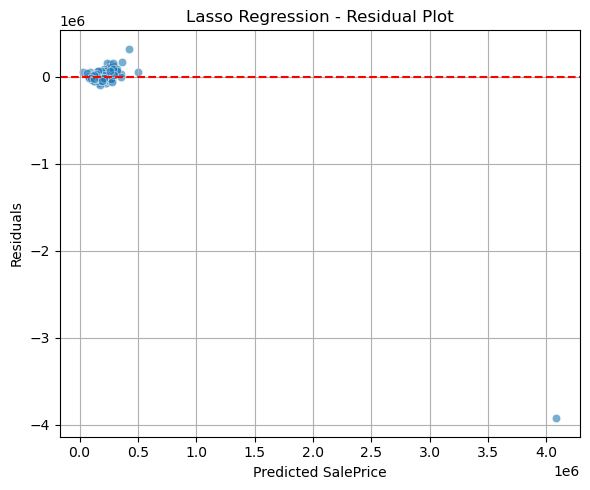

In [15]:
# ===============================
# Lasso Regression: Training and Evaluation
# ===============================

# Import required modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# -------------------------------
# Create and train Lasso model pipeline
# -------------------------------
# We use StandardScaler to normalize the features before applying Lasso
model_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.001, max_iter=10000))
model_lasso.fit(X_train, y_train)  # Fit on log-transformed target

# -------------------------------
# Predict on validation data
# -------------------------------
y_pred_log = model_lasso.predict(X_valid)  # Predicted log SalePrice
y_pred = np.expm1(y_pred_log)              # Convert from log to original scale
y_true = np.expm1(y_valid)                 # Actual SalePrice
residuals = y_true - y_pred                # Residuals

# -------------------------------
# Print evaluation metrics
# -------------------------------
print(" Lasso Regression")
print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))     # Root Mean Squared Error
print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))              # Mean Absolute Error
print("R²   :", round(r2_score(y_true, y_pred), 4))                         # Coefficient of Determination
print("MAPE :", round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2), "%")  # Mean Absolute Percentage Error

# -------------------------------
# Plot Actual vs Predicted
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction')
sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', label='Best Fit Line')
plt.title("Lasso Regression - Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation:
# A good prediction will cluster closely around the red dashed line (perfect prediction).
# The green line shows the fitted trend from the model.

# -------------------------------
# Plot Residuals
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Lasso Regression - Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation:
# Ideally, residuals should be randomly scattered around 0.
# Patterns or funnel shapes might indicate heteroscedasticity or model bias.


 Decision Tree
RMSE : 44604.99
MAE  : 28600.91
R²   : 0.7119
MAPE : 15.58 %


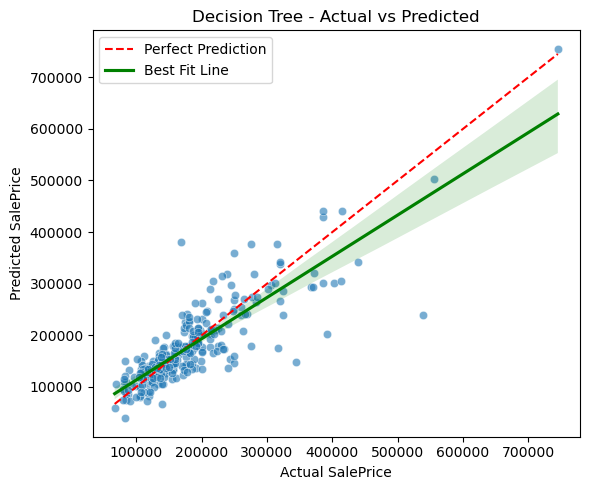

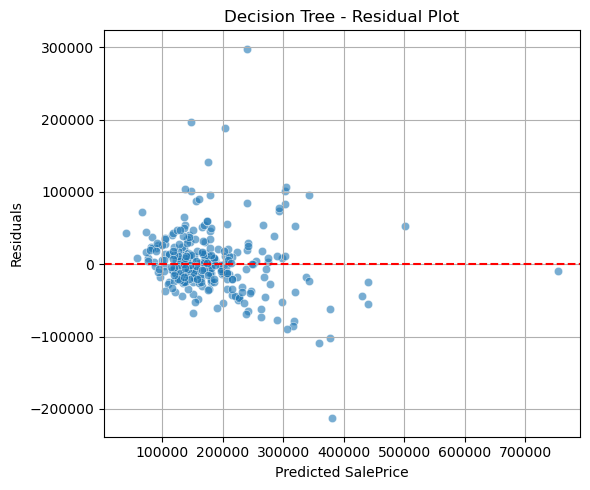

In [16]:
# ===============================
# Decision Tree Regressor: Training and Evaluation
# ===============================

# Import required tools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# -------------------------------
# Train Decision Tree model
# -------------------------------
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)  # Fit model on training data (log-transformed SalePrice)

# -------------------------------
# Predict on validation data
# -------------------------------
y_pred_log = model_tree.predict(X_valid)  # Log scale predictions
y_pred = np.expm1(y_pred_log)             # Convert to original SalePrice scale
y_true = np.expm1(y_valid)                # Convert actual values
residuals = y_true - y_pred               # Residual errors

# -------------------------------
# Evaluate model performance
# -------------------------------
print(" Decision Tree")
print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))    # Root Mean Squared Error
print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))             # Mean Absolute Error
print("R²   :", round(r2_score(y_true, y_pred), 4))                        # R-squared
print("MAPE :", round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2), "%")  # Mean Absolute Percentage Error

# -------------------------------
# Plot Actual vs Predicted
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction')
sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', label='Best Fit Line')
plt.title("Decision Tree - Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation:
# This scatterplot shows how close the model predictions are to the actual values.
# If the points follow the red dashed line, the predictions are accurate.

# -------------------------------
# Plot Residuals
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Ideal error line
plt.title("Decision Tree - Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Interpretation:
# The residual plot shows the errors from predictions.
# A good model shows a random scatter of residuals around the zero line.


 Random Forest
RMSE : 41182.12
MAE  : 24830.92
R²   : 0.7544
MAPE : 13.19 %


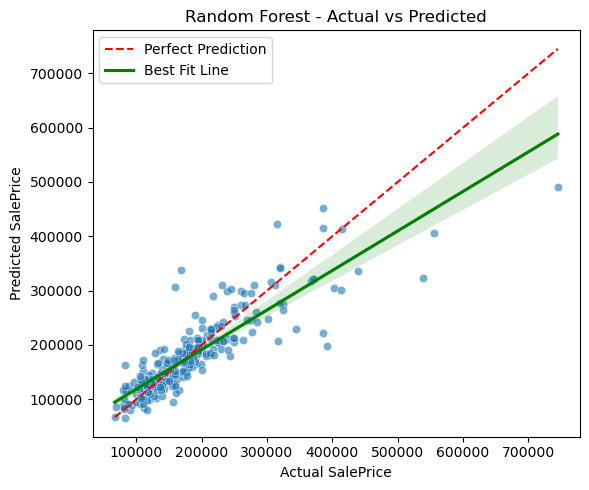

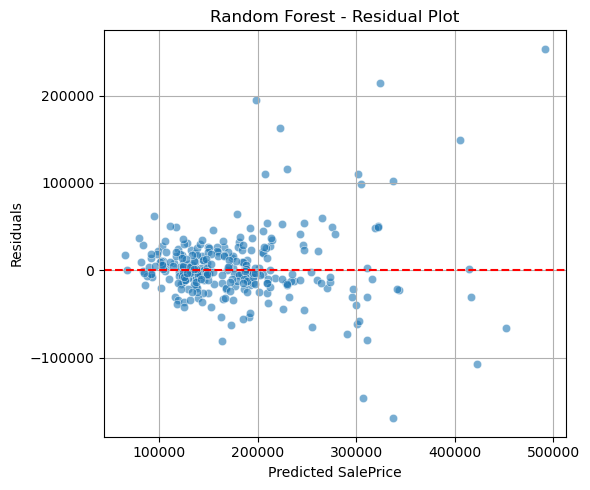

In [17]:
# ===============================
# Random Forest Regressor: Training and Evaluation
# ===============================

# Import required modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# -------------------------------
# Create and tune Random Forest model using GridSearchCV
# -------------------------------
model_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid={
        'n_estimators': [100],
        'max_depth': [10],
        'min_samples_split': [2]
    },
    cv=3,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)  # Fit on log-transformed SalePrice

# -------------------------------
# Predict on validation data
# -------------------------------
y_pred_log = model_rf.predict(X_valid)     # Predicted in log scale
y_pred = np.expm1(y_pred_log)              # Convert to original scale
y_true = np.expm1(y_valid)                 # Actual SalePrice
residuals = y_true - y_pred                # Calculate residuals

# -------------------------------
# Evaluation Metrics
# -------------------------------
print(" Random Forest")
print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))     # Root Mean Squared Error
print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))              # Mean Absolute Error
print("R²   :", round(r2_score(y_true, y_pred), 4))                         # R-squared
print("MAPE :", round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2), "%")  # Mean Absolute Percentage Error

# -------------------------------
# Plot Actual vs Predicted
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction')
sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', label='Best Fit Line')
plt.title("Random Forest - Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation:
# Ideally, the points should fall close to the red dashed line.
# This plot helps visualize how accurate the predictions are.

# -------------------------------
# Step 5: Residual Plot
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest - Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation:
# A random scatter of residuals around zero indicates a well-performing model.
# Patterns or trends in residuals suggest model bias or variance issues.


 XGBoost
RMSE : 41625.12
MAE  : 23746.52
R²   : 0.7491
MAPE : 12.76 %


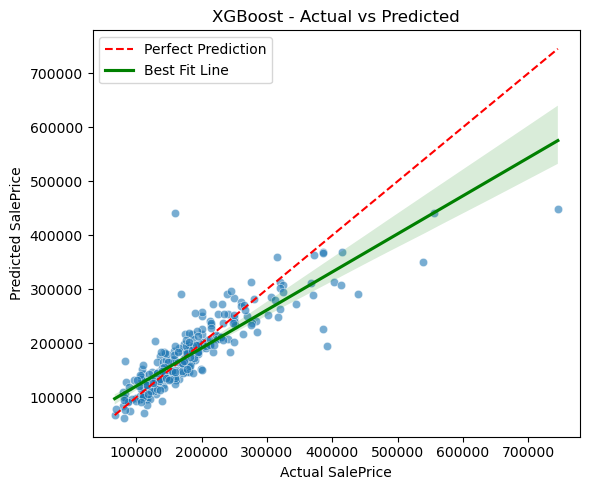

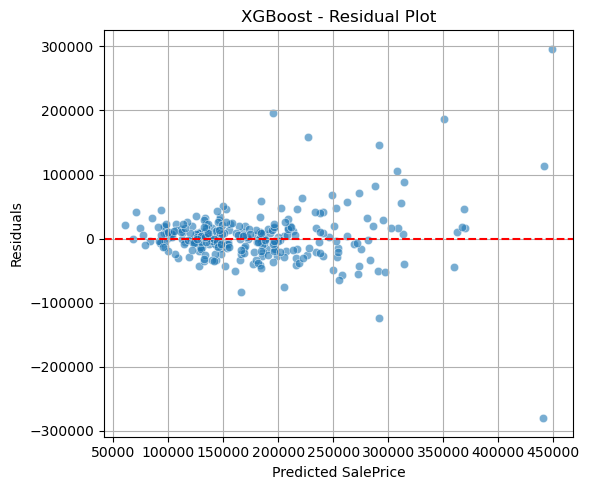

In [18]:
# ===============================
# XGBoost Regressor: Training and Evaluation
# ===============================

# Import necessary modules
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# -------------------------------
#  Define and tune XGBoost model using GridSearchCV
# -------------------------------
model_xgb = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid={
        'n_estimators': [100],
        'max_depth': [3],
        'learning_rate': [0.1]
    },
    cv=3,
    n_jobs=-1
)

# Fit model to training data (on log-transformed SalePrice)
model_xgb.fit(X_train, y_train)

# -------------------------------
#  Predict and inverse-transform predictions
# -------------------------------
y_pred_log = model_xgb.predict(X_valid)    # Predictions in log scale
y_pred = np.expm1(y_pred_log)              # Convert back to original SalePrice scale
y_true = np.expm1(y_valid)                 # Inverse transform actual values
residuals = y_true - y_pred                # Calculate residuals

# -------------------------------
#  Evaluation Metrics
# -------------------------------
print(" XGBoost")
print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))     # Root Mean Squared Error
print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))              # Mean Absolute Error
print("R²   :", round(r2_score(y_true, y_pred), 4))                         # R-squared
print("MAPE :", round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2), "%")  # Mean Absolute Percentage Error

# -------------------------------
#  Plot Actual vs Predicted
# -------------------------------
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction')
sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', label='Best Fit Line')
plt.title("XGBoost - Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation:
# This scatterplot compares actual vs predicted prices.
# Points closer to the red dashed line indicate better predictions.

# -------------------------------
# Residual Plot
# -------------------------------
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("XGBoost - Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Interpretation:
# Random distribution of residuals around 0 indicates a well-fitted model.
# Non-random patterns may suggest underfitting or overfitting.


 SVR (Support Vector Regression)
RMSE : 46109.2
MAE  : 28766.01
R²   : 0.6921
MAPE : 15.51 %


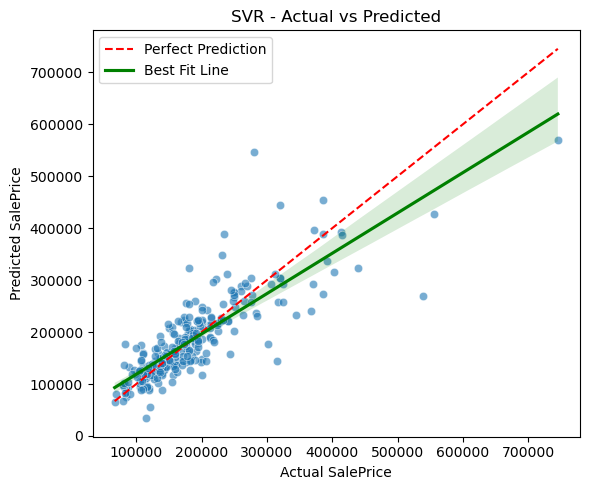

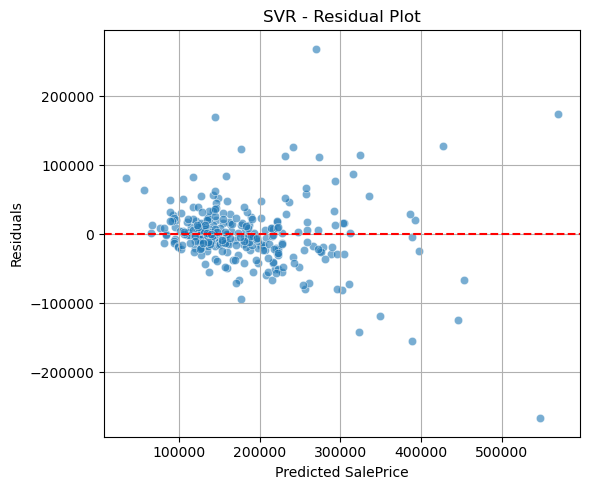

In [19]:
# ===============================
# SVR (Support Vector Regression): Training and Evaluation
# ===============================

# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# -------------------------------
# Define SVR model in a pipeline with feature scaling
# -------------------------------
model_svr = make_pipeline(
    StandardScaler(),                           # Scale features to mean=0 and std=1
    SVR(kernel='rbf', C=100, epsilon=0.1)       # RBF kernel with regularization C and margin epsilon
)

# Train model on log-transformed SalePrice
model_svr.fit(X_train, y_train)

# -------------------------------
# Predict and reverse log transformation
# -------------------------------
y_pred_log = model_svr.predict(X_valid)         # Predict on validation set (log scale)
y_pred = np.expm1(y_pred_log)                   # Reverse log transformation to original SalePrice
y_true = np.expm1(y_valid)                      # Convert actual values back to original scale
residuals = y_true - y_pred                     # Calculate residuals (errors)

# -------------------------------
# Evaluation Metrics
# -------------------------------
print(" SVR (Support Vector Regression)")
print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))     # Root Mean Squared Error
print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))              # Mean Absolute Error
print("R²   :", round(r2_score(y_true, y_pred), 4))                         # R² score
print("MAPE :", round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2), "%")  # Mean Absolute Percentage Error

# -------------------------------
# Actual vs Predicted Plot
# -------------------------------
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Perfect Prediction')
sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', label='Best Fit Line')
plt.title("SVR - Actual vs Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation:
# This plot shows how close predicted values are to the actual values.
# The red dashed line represents a perfect prediction line.

# -------------------------------
# Residual Plot
# -------------------------------
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("SVR - Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation:
# Ideally, residuals should be randomly distributed around 0.
# Patterns in the residuals may suggest model bias or variance issues.


In [20]:
# Evaluate all models and collect results
results = []

# 1. Linear Regression
results.append({
    "Model": "Linear Regression",
    "RMSE": round(np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(model_lr.predict(X_valid)))), 2),
    "MAE": round(mean_absolute_error(np.expm1(y_valid), np.expm1(model_lr.predict(X_valid))), 2),
    "R²": round(r2_score(np.expm1(y_valid), np.expm1(model_lr.predict(X_valid))), 4),
    "MAPE (%)": round(mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(model_lr.predict(X_valid))) * 100, 2)
})

# 2. Lasso Regression
results.append({
    "Model": "Lasso Regression",
    "RMSE": round(np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(model_lasso.predict(X_valid)))), 2),
    "MAE": round(mean_absolute_error(np.expm1(y_valid), np.expm1(model_lasso.predict(X_valid))), 2),
    "R²": round(r2_score(np.expm1(y_valid), np.expm1(model_lasso.predict(X_valid))), 4),
    "MAPE (%)": round(mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(model_lasso.predict(X_valid))) * 100, 2)
})

# 3. Decision Tree
results.append({
    "Model": "Decision Tree",
    "RMSE": round(np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(model_tree.predict(X_valid)))), 2),
    "MAE": round(mean_absolute_error(np.expm1(y_valid), np.expm1(model_tree.predict(X_valid))), 2),
    "R²": round(r2_score(np.expm1(y_valid), np.expm1(model_tree.predict(X_valid))), 4),
    "MAPE (%)": round(mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(model_tree.predict(X_valid))) * 100, 2)
})

# 4. Random Forest
results.append({
    "Model": "Random Forest",
    "RMSE": round(np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(model_rf.predict(X_valid)))), 2),
    "MAE": round(mean_absolute_error(np.expm1(y_valid), np.expm1(model_rf.predict(X_valid))), 2),
    "R²": round(r2_score(np.expm1(y_valid), np.expm1(model_rf.predict(X_valid))), 4),
    "MAPE (%)": round(mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(model_rf.predict(X_valid))) * 100, 2)
})

# 5. XGBoost
results.append({
    "Model": "XGBoost",
    "RMSE": round(np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(model_xgb.predict(X_valid)))), 2),
    "MAE": round(mean_absolute_error(np.expm1(y_valid), np.expm1(model_xgb.predict(X_valid))), 2),
    "R²": round(r2_score(np.expm1(y_valid), np.expm1(model_xgb.predict(X_valid))), 4),
    "MAPE (%)": round(mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(model_xgb.predict(X_valid))) * 100, 2)
})

# 6. SVR
results.append({
    "Model": "SVR",
    "RMSE": round(np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(model_svr.predict(X_valid)))), 2),
    "MAE": round(mean_absolute_error(np.expm1(y_valid), np.expm1(model_svr.predict(X_valid))), 2),
    "R²": round(r2_score(np.expm1(y_valid), np.expm1(model_svr.predict(X_valid))), 4),
    "MAPE (%)": round(mean_absolute_percentage_error(np.expm1(y_valid), np.expm1(model_svr.predict(X_valid))) * 100, 2)
})

# Create DataFrame and display
results_df = pd.DataFrame(results)
print(" Final Model Evaluation Summary:")
display(results_df.sort_values(by='RMSE'))


 Final Model Evaluation Summary:


,Model,RMSE,MAE,R²,MAPE (%)
3,Random Forest,41182.12,24830.92,0.7544,13.19
4,XGBoost,41625.12,23746.52,0.7491,12.76
2,Decision Tree,44604.99,28600.91,0.7119,15.58
5,SVR,46109.20,28766.01,0.6921,15.51
1,Lasso Regression,233516.09,41247.73,-6.8962,23.90
0,Linear Regression,244389.89,41853.21,-7.6487,24.32


In [21]:
# Preparing predict_data and Encode it the Same Way
# Fit Best Model on Full Data and Predict Missing SalePrice

# Fill missing values in categorical features
for col in predict_data.select_dtypes(include='object').columns:
    predict_data[col] = predict_data[col].fillna(predict_data[col].mode()[0])

# Fill missing values in numeric features
for col in predict_data.select_dtypes(include=['float64', 'int64']).columns:
    predict_data[col] = predict_data[col].fillna(predict_data[col].median())

# Redo encoding
OH_cols_predict = pd.DataFrame(OH_encoder.transform(predict_data[object_cols]))
OH_cols_predict.columns = OH_encoder.get_feature_names_out()
OH_cols_predict.index = predict_data.index

predict_num = predict_data.drop(object_cols, axis=1)
predict_final = pd.concat([predict_num, OH_cols_predict], axis=1)

# Align columns with training set
predict_final = predict_final.reindex(columns=X_train.columns, fill_value=0)


In [22]:
# Train best model on full training data
best_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
best_model.fit(X, y)

# Predict SalePrice
predict_log = best_model.predict(predict_final)
predict_price = np.expm1(predict_log)

# Fill in predicted values
predict_data['SalePrice'] = predict_price

# Combine into final dataset
final_data = pd.concat([train_data, predict_data], axis=0).sort_index()


In [23]:
final_data.tail

<bound method NDFrame.tail of       MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993  

In [24]:
final_data['SalePrice']

0       208500.000000
1       181500.000000
2       223500.000000
3       140000.000000
4       250000.000000
            ...      
2914     96248.381566
2915     85573.077223
2916    203210.729332
2917    174639.483668
2918    219198.395273
Name: SalePrice, Length: 2919, dtype: float64

In [25]:
final_data.shape

(2919, 12)